## ANALIZA PODATKOV - KNJIGE


Najprej je potrebno naložiti podatke z interneta. Ker smo podatke že naložili in obdelali lokalno, tega ne potrebujemo posebej zaganjati.

In [ ]:
import prevedi_in_shrani_podatke

# prevede in shrani podatke z interneta
prevedi_in_shrani_podatke.save_web_data()

In [ ]:
import obdelaj_podatke

# obdela shranjene podatke in jih zapise v csv datoteko
obdelaj_podatke.pripravi_podatke_za_csv()

# TABELA S PODATKI

Za prikaz vhodnih podatkov uporabimo knjižnico pandas.

In [10]:
# naložimo paket
import pandas as pd

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.set_option('display.max_rows', 10)

# izberemo interaktivni "notebook" stil risanja
%matplotlib inline

# naložimo razpredelnico, s katero bomo delali
KNJIGE = pd.read_csv('koncni_podatki/podatki_o_knjigi.csv', index_col='naslov', encoding='utf-8')

In [11]:
KNJIGE

,avtor,dolzina,zvrst,o_pisatelju
naslov,,,,
"Ne povej, kaj si sanjala - zvočna knjiga na USB ključu",Feri Lainšček,131.0,roman,"Pisatelj, pesnik, dramatik in scenarist Feri L..."
Terenske raziskave ukrajinskega seksa,Oksana Zabužko,168.0,roman,Oksana Zabužko (1960) je ugledna ukrajinska fi...
Mitrejin koder,Miha Remec,204.0,roman,"Miha Remec (1922, Ptuj) je pisec znanstvene fa..."
Moje leto v Nikogaršnjem zalivu,Peter Handke,NaN,roman,Peter Handke (1942) je eden največjih živečih ...
Dežela ZOO,Dušan Čater,200.0,roman,"Du&scaron;an Čater (1968) je pisatelj, prevaja..."
...,...,...,...,...
Veronikin prt,Josip Osti,116.0,poezija,"Josip Osti (1945-;2021) je bil pesnik, pisatel..."
"Oče, tvoje oči gorijo",Ivo Svetina,116.0,poezija,"Ivo Svetina (1948, Ljubljana) je eden pomembne..."
Pod kamni plešem,Jure Vuga,77.0,poezija,"Jure Vuga (1983, Koper) je profesor umetnostne..."


# PROUČEVANJE PODATKOV

Najprej bomo uvozili knjižnico za risanje grafov.

In [12]:
import matplotlib.pyplot as plt

Poglejmo si, kateri avtor ima v prodaji največ knjig.

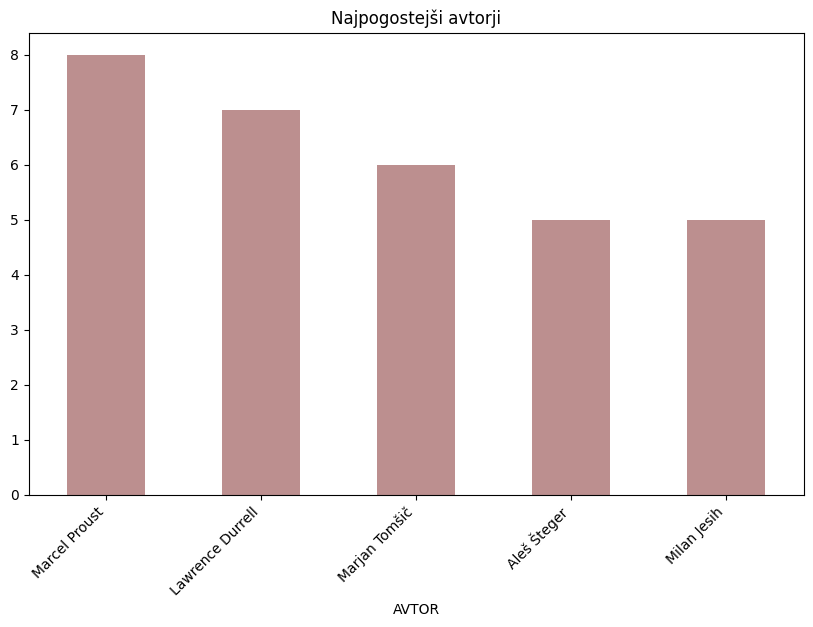

In [18]:
# izberemo 5 najpogostejših avtorjev
najpogosteje = KNJIGE['avtor'].value_counts().nlargest(5)

# narisemo histogram
plt.figure(figsize=(10, 6))
najpogosteje.plot(kind='bar', color='rosybrown')
plt.title('Najpogostejši avtorji')
plt.xlabel('AVTOR')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.show()

Poglejmo si, kakšna je povprečna dolžina knjige glede na zvrst. Rezultat prikažemo s tortnim diagramom.

            dolzina
zvrst              
poezija  239.807143
roman    427.220430


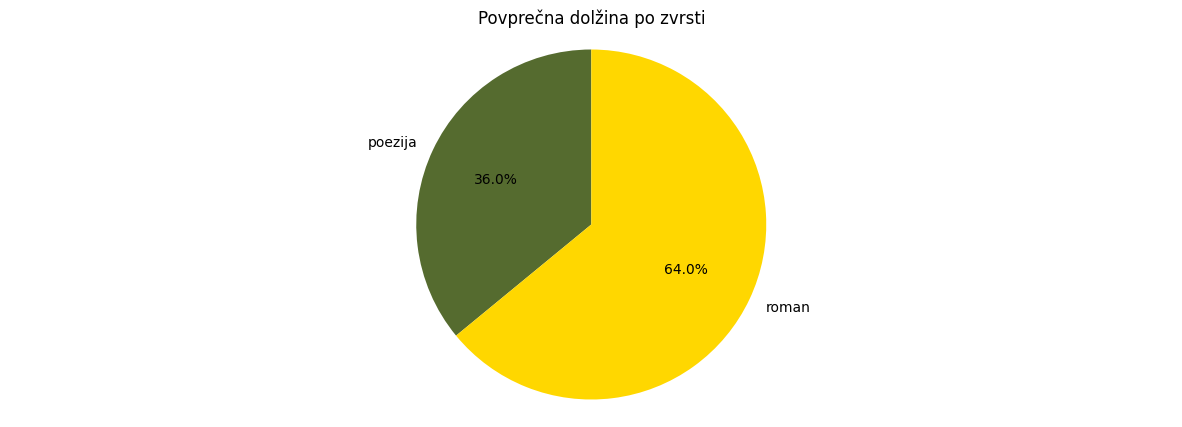

In [49]:
povprecna_dolzina_po_zvrsti = KNJIGE[['dolzina', 'zvrst']].groupby(by = 'zvrst').mean()
print(povprecna_dolzina_po_zvrsti)

fig, (ax1) = plt.subplots(1, figsize=(15, 5))

# Narisemo tortni diagram za dolžino
povprecna_dolzina_po_zvrsti['dolzina'].plot.pie(
    autopct='%1.1f%%', startangle=90, ax=ax1, colors = ['darkolivegreen', 'gold'])
ax1.set_title('Povprečna dolžina po zvrsti')
ax1.axis('equal')  # To zagotovi, da je tortni diagram krožen
ax1.set_ylabel('')  # Odstrani y-etiketo

plt.show()